# Chap04 - 모델 훈련

Chap01 ~ 03에서 실습때 사용한 머신러닝 모델은 작동 원리를 몰라도 사용할 수 있는 Scikit-Learn을 이용해 실습을 했었다. 

하지만, 머신러닝 알고리즘이 어떻게 작동하는지 알고 있으면, 데이터 분석 목적에 맞는 적절한 모델 그리고 하이퍼파라미터를 빠르게 찾을 수 있다. 

이번 장에서는 가장 간단한 모델인 선형 회귀(Linear Regression)에 대해 다음과 같이 두 가지 방법을 통해 알아본다.

> - 직접 계산할 수 있는 공식을 사용하여 Train Set에 가장 잘 맞는 파라미터를 구하는 방법
- 경사하강법(Gradient Descent)를 이용하여 반복적인 최적화 방식을 사용해 파라미터를 조금씩 수정하면서 비용함수를 Train Set에 대해 최소화시키는 파라미터를 구하는 방법

## SetUp

In [15]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
plt.rcParams['axes.unicode_minus'] = False

## 4.1 선형 회귀(Linear Regression)


선형회귀(linear regression)은 데이터 집합 $\{ y_{i}, x_{i1}, \dots , x_{ip} \}_{i=1}^{n} $ 에 대해, 종속변수(label) $y_i$와 $p$개의 설명변수(feature) $x_i$ 사이의 선형 관계를 모델링한다(출처: wikipedia).

$$
y_i = w_1 x_{i1} + \cdots + w_{p} x_{ip} + b_i = \mathbf{x}_{i}^{T} \mathbf{W} + b_i, \quad i = 1, \dots , n 
$$

- $y_i$는 예측값
- $p$는 특성(feature)의 개수
- $x_ip$는 $p$번째 특성값
- $w_i$는 $i$번째 파라미터

선형회귀는 변수에 따른 일차방식과 같다.
이에 대한 간단한 이해를 위해 예시를 들려고한다.

![](./images/4-1.png)


간단한 x와 y가 존재하는 데이터이다. 우리가 알고있는 일차방정식 h(x) = wx+b가 y를 예측하기 위해서는 w와 b를 어떻게 설정하냐에 따라 달라진다.


![](./images/4-2.jpg)

위 그림을 보았을 때, w와 b의 설정값에 따라 예측 정확도가 달라지는 것을 파악할 수 있다.

이 처럼 학습을 통해 정확도가 상승하는 것은 가장 적절한 w와 b를 탐색하는 과정이다.

y를 가장 잘 설명하는 w, b를 판단하기 위해서 우리는 Cost Function으로 MSE를 사용하다.



#### MSE (Mean Squared Error)

위의 선형 회귀 모델을 학습시켜 Train Set에 잘 맞는 파라미터를 찾아야 한다. 이러한 파라미터를 찾은 뒤 잘 맞는지 성능을 측정하는 지표로는 평균 제곱근 오차(RMSE, Root Mean Squared Error)가 있다. RMSE는 MSE식에 루트를 씌운것이므로, 결국 MSE를 최소화하는 파라미터 $\mathbf{W}$를 찾아야 한다. MSE 식은 다음과 같다.

$$
MSE = \frac{1}{n} \sum_{i=1}^{n}{\left( \mathbf{H(x)_{i}} - y_{i}\right)}^{2}
$$

MSE는 실제값 $\mathbf{y_{i}}$와 예측값 $\mathbf{H(x)_{i}}$의 차이의 제곱이다. 실제값과 예측값을 측정하여 이를 가장 최소화하는 것을 목적으로 한다.

제곱을 쓰는 MSE 외에도 절대값을 이용하는 MAE(Mean Absolute Error)가 존재하지만 MSE를 주로 사용하는 이유를
알아볼 필요가 있다.

    1. 공통적으로 MSE와 MAE는 양수값을 가진다. 양수로 통일하지 않는 경우 값이 증감하여 비용을 정확하게 파악할 수 없다.
    2. MSE는 제곱을 하기 때문에, 차이가 클 경우 MAE보다 더 큰 차이값을 가진다. 이는 차이가 큰 부분에 더 큰 가중치를 부여하기 때문에 학습의 설명력이 더 높아진다.
    3. MSE는 Convex하다는 특징을 가지고 있다. 이는 미분을 통해 MSE를 가장 낮아지는 부분을 찾을 수 있다는 장점이 있다.


![](./images/4-3.jpg)

위와 같이 **MSE**는 미분값이 점점 낮아지고 0이 되는 Convex한 지점을 가지고 있다. 이전 Weight값에 Cost Function을 미분하여, Cost가 더 낮아지는 Weights값을 파악할 수 있다.

### 4.1.1 정규방정식

$$
\hat{\mathbf{W}} = \left( \mathbf{X}^{T} \cdot \mathbf{X} \right)^{-1} \cdot \mathbf{X}^{T} \cdot \mathbf{y}
$$

선형대수학의 정규방정식을 통해서 w와 b를 한번에 구하는 방법이 존재한다. 하지만 이는 회귀분석에서만 통용되며, 앞으로 볼 기법들에서는 사용할 수 없기 때문에 간단히 실행만 해볼 것이다. 이에 대한 수식의 증명하는 식은 아래와 같다.

![](./images/4-4.jpg)


In [16]:
# 데이터를 만드는 과정이다.
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

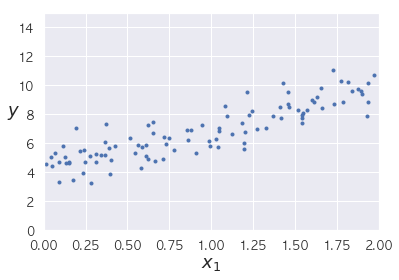

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

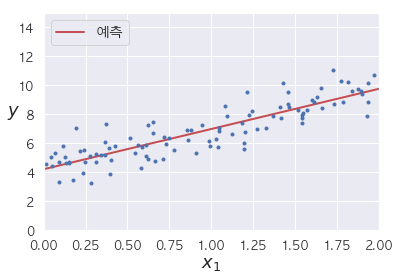

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

위의 과정을 Scikit-Learn에서는 `LinearRegression`을 사용해 구할 수 있다.

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

/Users/cjh/miniconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Scikit-Learn을 이용할때나, 정규방정식이나 W와 b가 동일한 것을 파악할 수 있다. 하지만
더 크고 복잡한 데이터에서는 메모리가 부족할 수 있으며, 이에 따라 경사하강법을 학습해볼 것입니다.

## 4.2 경사 하강법

경사 하강법에서 중요한 하이퍼파라미터는 **학습률**(learning rate, $\eta$)이다. 학습률이 너무 작으면 수렴하는데까지 시간이 오래걸리고, 학습률이 너무 크면 발산하게 된다. 보통 로그 스케일로 0.001($10^{-3}$), 0.001($10^{-2}$)와 같이 지정한다.

경사 하강법을 사용할 때는 반드시 모든 특성(feature)들이 같은 스케일을 가지도록 해야한다(Standard 또는 MinMax 등). 그렇지 않으면 학습시간이 오래걸리게 된다. 

![](./images/gd.gif)

### 4.2.1 경사 하강법

$$
\frac{\partial}{\partial w_j} MSE(\mathbf{W}) = \frac{2}{m} \sum_{i=1}^{m}{\left( \mathbf{W}^{T} \cdot \mathbf{x}_{i} - y_{i}\right)}x_{ij}
$$

$$
\nabla_{\mathbf{W}} \text{MSE}(\mathbf{W}) = \begin{bmatrix} \frac { \partial  }{ \partial w_{ i } } { MSE }(W) \\ \vdots \\ \frac { \partial  }{ \partial w_{ i } } { MSE }(W) \end{bmatrix} = \frac{2}{m} \mathbf{X}^{T} \cdot \left( \mathbf{X} \cdot \mathbf{W} - \mathbf{y} \right)
$$

#### 경사 하강법 Step

$$
\mathrm{W} \leftarrow \mathrm{W} - \eta \nabla_{\mathbf{W}} \text{MSE}(\mathbf{W}) \Longleftrightarrow 
 \mathrm{W} \leftarrow \mathrm{W} - \eta \frac{\partial L}{\partial \mathrm{W}} 
$$

In [12]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

weight = np.random.randn(2, 1)  # random init

for step in range(n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - eta * gradients
    
    if (step+1) % 200 == 0:
        print('Step :{:04d}, weight = \n {}'.format(step+1, weight))
    
print('최종 결과값 : \n{}'.format(weight))

Step :0200, weight = 
 [[4.21338573]
 [2.7716236 ]]
Step :0400, weight = 
 [[4.21509444]
 [2.7701149 ]]
Step :0600, weight = 
 [[4.21509616]
 [2.77011339]]
Step :0800, weight = 
 [[4.21509616]
 [2.77011339]]
Step :1000, weight = 
 [[4.21509616]
 [2.77011339]]
최종 결과값 : 
[[4.21509616]
 [2.77011339]]


In [13]:
weight_path_bgd = []

def plot_gradient_descent(weight, eta, weight_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(weight)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - eta * gradients
        if weight_path is not None:
            weight_path.append(weight)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

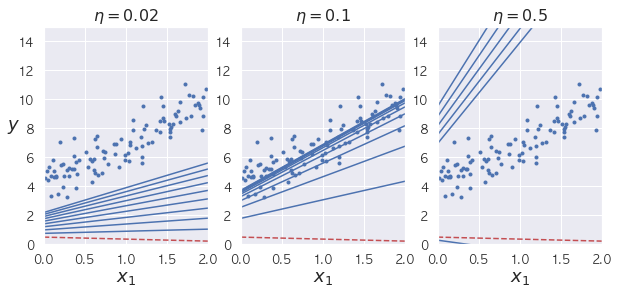

In [14]:
np.random.seed(42)
weight = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(weight, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(weight, eta=0.1, weight_path=weight_path_bgd)
plt.subplot(133); plot_gradient_descent(weight, eta=0.5)
plt.show()

각 learning rate에 따라, 학습 속도의 차이를 파악할 수 있습니다. 0.02의 경우 천천히 학습하고 나쁘지 않았습니다.
0.1은 빠르게 최적의 선을 찾은 반면 n=0.5일때는, 적절한 학습이 되지 않은 것을 파악할 수 있습니다.

![](./images/4-5.jpg)
이를 통해, Learning Rate를 적절히 설정함에 따라, 학습 성과의 차이를 가져온다는 것을 파악할 수 있었습니다.
너무 낮으면 느릴 수 있으며, 너무 높을 경우에도 이상적이지 않습니다.
![](./images/4-6.png)
추가로 선형회귀분석은 Local Minimum이 없지만, 추후에 배울 알고리즘에는 존재할 수 있습니다. 우리의 목표는
Global Minimum을 찾는 것이므로, 너무 낮은 Learning Rate에서는 Local Minimum에서 학습이 종료될 수 있습니다.

경사하강법에는 세가지 방법이 존재합니다. 각 방법의 특징을 간단히 설명해보겠습니다.

**배치 경사 하강법(Batch Gradient Descent)** - 전체 데이터에 대해서 경사하강법을 실시합니다. 데이터가 클 경우, 시간이 많이 걸립니다.

**확률적 경사 하강법(Stochastic Gradient Descent)** - 전체 데이터 중 하나의 데이터만 반복적으로 추출하여, 경사하강법을 실시합니다. 학습의 변동성이 매우크고 효율적이지 못합니다.

**미니배치 경사 하강법(Minibatch Gradient Descent)** - 전체 데이터를 본인이 설정한 미니배치 수만큼 나누어서, 경사하강법을 실시합니다. 배치보다는 빠르며, SGD보다는 높은 정확도를 제공한다.

### 4.2.2 확률적 경사 하강법

경사 하강법의 가장 큰 문제는 매 스텝(step)에서 전체 Train Set을 사용해 Gradient Descent를 계산한다는 것이다. 따라서, Train Set가 커지면 학습이 매우 느려지게 된다. 

이를 해결하기 위해, **확률적 경사 하강법**(Stochastic Gradient Descent)은 매 스텝에서 랜덤하게 하나의 데이터(샘플)을 선택해 Gradient Descent(GD)를 계산한다. 따라서, 전체 데이터를 이용해 GD를 계산하는 것보다 속도는 빠르지만 훨씬 불안정하다. 비용 함수(Loss Function)가 최소값에 수렴할 때까지 부드럽게 감소하지 않고, 위아래로 요동치면서 평균적으로 감소한다. 

이처럼 비용 함수가 불규칙하게 요동치면서 감소할 경우 지역 최소값(local minimum)을 건너뛸 수 있는 가능성이 있기 때문에, SGD가 전역 최소값(global minimum)을 찾을 가능성이 높다. 하지만 이러한 무작위성은 지역 최소값을 탈출할 수 있지만, 전역 최소값에는 다다르지 못하는 경우가 있다. 이를 해결하기 위해 학습률(learning rate)을 점진적으로 감소 시키는 **learning rate decay** 기법을 사용한다. 

learning rate decay(또는 learning rate schedule)는 학습을 시작할 때는 학습률을 크게하고, 점진적으로 학습률을 줄여 전역 최소값에 도달하게 하는 방법이다.

In [15]:
weight_path_sgd = []
m = len(X_b)
np.random.seed(42)

Epoch :010, weight = 
 [[4.06816038]
 [2.87191524]]
Epoch :020, weight = 
 [[4.31147477]
 [2.36946783]]
Epoch :030, weight = 
 [[4.15164305]
 [3.02460342]]
Epoch :040, weight = 
 [[4.52385874]
 [2.57195944]]
Epoch :050, weight = 
 [[3.7625155]
 [2.5892927]]


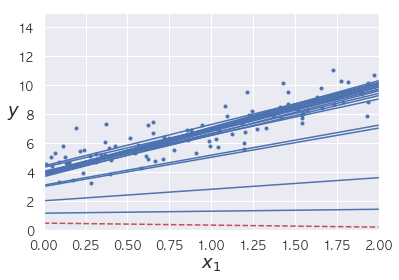

In [16]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

weight = np.random.randn(2, 1)  # random init

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(weight)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(weight) - yi)
        eta - learning_schedule(epoch * m + i)
        weight = weight - eta * gradients
        weight_path_sgd.append(weight)
        
    if (epoch+1) % 10 == 0:
        print('Epoch :{:03d}, weight = \n {}'.format(epoch+1, weight))
        
        
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()    

Scikit-Learn에서는 SGD방법을 이용한 Regression인 `SGDRegressor` 클래스가 있다.

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

### 4.2.3 미니배치 경사 하강법

**미니배치 경사 하강법**(Mini-batch Gradient Descent)은 각 스텝에서 전체 Train Set을  미니배치(mini-batch), 즉 작은 데이터셋을 추출한 뒤 Gradient를 계산하는 방법이다. 미니배치 경사하강법의 장점은 행렬 연산에 최적화된 하드웨어, GPU에서 빠르게 수행되는 것이다. 

미니배치 경사 하강법은 SGD에 비해 덜 불규칙하게 감소하지만, local minimum에 빠질 확률은 높은 경우가 있다.

In [23]:
weight_path_mgd = []

n_iterations = 100
minibatch_size = 20

np.random.seed(42)
weight = np.random.randn(2,1)  # random init

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(weight) - yi)
        eta = learning_schedule(t)
        weight = weight - eta * gradients
        weight_path_mgd.append(weight)
        
    if (epoch+1) % 10 == 0:
        print('Epoch :{:03d}, weight = \n {}'.format(epoch+1, weight))

Epoch :010, weight = 
 [[4.11876962]
 [2.71062372]]
Epoch :020, weight = 
 [[4.29567078]
 [2.85337842]]
Epoch :030, weight = 
 [[4.26475032]
 [2.83179316]]
Epoch :040, weight = 
 [[4.2695937 ]
 [2.84744074]]
Epoch :050, weight = 
 [[4.25214635]
 [2.7896408 ]]
Epoch :060, weight = 
 [[4.17570373]
 [2.71753586]]
Epoch :070, weight = 
 [[4.18828417]
 [2.73913778]]
Epoch :080, weight = 
 [[4.23775075]
 [2.79420372]]
Epoch :090, weight = 
 [[4.19059905]
 [2.7524648 ]]
Epoch :100, weight = 
 [[4.15421822]
 [2.69721385]]


In [24]:
weight_path_bgd = np.array(weight_path_bgd)
weight_path_sgd = np.array(weight_path_sgd)
weight_path_mgd = np.array(weight_path_mgd)

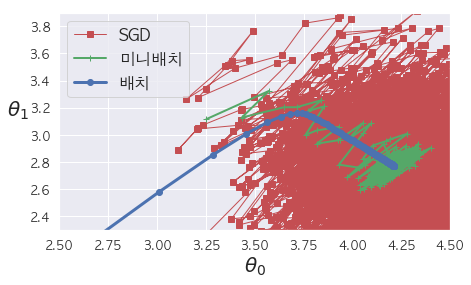

In [25]:
plt.figure(figsize=(7,4))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-+", linewidth=2, label="미니배치")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-o", linewidth=3, label="배치")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

## 4.3 다항 회귀 (Polynomial Regression)

**다항 회귀**(polynomial regression)는 각 특성(feature)의 제곱을 새로운 특성으로 추가하여 선형 모델을 학습시키는 방법을 말한다. 다항 회귀의 식은 다음과 같다.

$$
y = w_0 + w_1 x_1 + w_2 x_2^{2} + \cdots w_n x_n^{m} 
$$

우리가 앞서 배웠던 선형회귀와의 차이점은 특징의 차수가 달라진다는 점입니다. 실제로 세상에는 선형적으로 설명될 수 있는 부분이 매우 적습니다. 균등하게 상승하는 것이 아닌 점차 커질수도 혹은 상승하다 감소할 수도 있습니다.

이러한 제곱은 회귀분석이 기존의 직선(**선형**)이 아닌 곡선으로 변하며, **비선형성**을 포함할 수 있다는 장점이 있습니다.

하지만 차수를 증가시키는게 그 특징을 설명하는 방법이 아닐 수도 있으므로, 최적의 식을 찾는 것은 어렵기도 합니다.

In [26]:
np.random.seed(42)

In [28]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

위의 식, 

$$
y = 0.5 x^2 + 2x + 2 + \epsilon
$$

에 대해 그래프를 그려보면 다음과 같다.

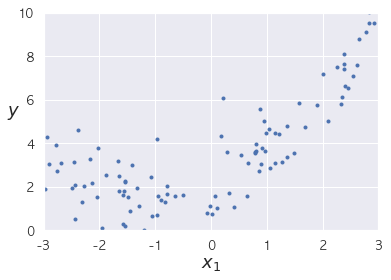

In [29]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

위의 식에 맞게끔 Scikit-Learn의 `PolynomialFeatures`를 이용해 데이터의 특성(feature, 여기서 $X$)을 제곱해 보자.

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print('X[0] :', X[0])
print('X_poly[0] :', X_poly[0])

X[0] : [-0.49553398]
X_poly[0] : [-0.49553398  0.24555393]


위에서 추가한 특성을 이용해 `LinearRegression`을 이용해 모델을 적합시켜 보자.

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
lin_reg.intercept_, lin_reg.coef_

(array([2.06378633]), array([[1.03980376, 0.49203671]]))

예측된 모델은 다음과 같다.

$$
y = 0.49 x^2 + 1.04 x + 2.064
$$

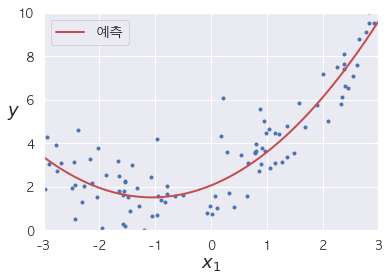

In [35]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## 4.4 학습 곡선 (Learning Curve)

Chap2에서 과대적합에 대해서 배울 수 있었습니다. 과대적합은 Train Data를 맞추는데 집중되어, 
Test Set, 즉 실제 데이터에 대한 정확도는 낮은 경우를 말합니다.
**Overfitting**은 학습에 이용되는 Train Set 정확도는 매우 높고, Test Set의 정확도는 낮은 경우를 의미한다.

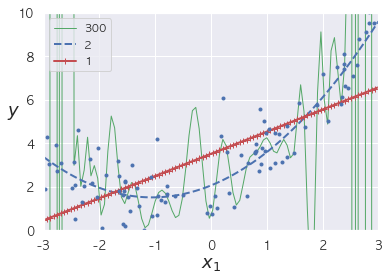

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

차수를 300까지 오른 경우에, train의 정확도는 높게 나올 수 있지만, test의 정확도는 낮을 것입니다.
이와 같은 경우를 Overfitting(과대적합)이라고 합니다.

![](./images/curve.png)
위와같이 Overfitting은  Train, Validation 정확도를 보았을 때, Train은 매우 정확성이 높지만, Validation이 낮은 경우를 의미한다. 이렇게 과적합 되었는지를 확인하는 방법으로는 **학습 곡선**(learning curve)을 이용해 확인할 수 있다.

![](./images/bais.png)
머신러닝에서 편향과 분산의 트레이드오프를 파악하는 것이 결과를 해석하는데 도움이 된다.

**편향**은 일반화 오차중 편향은 잘못된 가정으로, 편향이 큰 경우 과소적합일 확률이 큽니다.

**분산**은 변동성이 큰 것을 의미하며, 높은 분산은 과대적합인 경향이 많다.

편향과 분산이 모두 낮은게 가장 이상적인 모델입니다. 하지만 편향이 내려가면 분산이 올라가고 분산이 내려가면 편향이 올라가므로,
둘은 트레이드오프(Trade-off)관계를 가지오 있습니다.

Overfitting이 되어있는 경우에, 규제를 이용하여 과대적합을 막을 수 있습니다.

## 4.5 규제(Regularization)가 있는 선형 모델

Regularization의 역할과 사용이유는 무엇일까 살펴볼 필요가 있다.
규제를 사용할 경우, 모델의 복잡성이 줄어들고 이는 W가 커지는 것을 방지 것을 방지합니다.

이는 첫번째로 앞서 보았던, Overfitting을 방지할 수 있는 장점이 있다.

두번째로 중요하지 않은 변수들의 가중치를 낮추어, 변수를 선택하는 효과를 가질 수 있습니다. 

이들이 이런 효과를 내는 이유는 경사하강법에 새로운 Penalty항을 추가하는 방식으로 가능하다. 그러므로 Ridge와 Lasso를 통해 파악해 볼 예정이다.

### 4.5.1 릿지 회귀 (Ridge Regression)

**릿지 회귀**(또는 티호노프 규제)는 규제(regularization)가 추가된 선형 회귀 모델이다. 규제항(regularization term) $\lambda \sum_{i=1}^{n}{w_{i}^{2}}$ 이 비용함수(loss function)에 추가된다. 

따라서, 모델(알고리즘)을 데이터에 적합 시키는 것뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 한다. 규제항은 학습에만 사용되며 테스트 시에는 규제항이 사용되지 않는다.

$$
J(w) = \text{MSE}(w) + \lambda \sum_{i=1}^{n}{w_{i}^{2}}
$$

위의 식에서 $\lambda$는 하이퍼파라미터이며, 모델을 얼마나 많이 규제할지 조절한다. $\lambda = 0$이면 릿지 회귀는 일반 선형 회귀와 같아지며, $\lambda$가 커지게되면 모든 가중치가 거의 0에 가까워져, 결국 데이터의 평균을 지나는 선이 된다.

릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 데이터 스케일을 맞춰주는것이 중요하다.

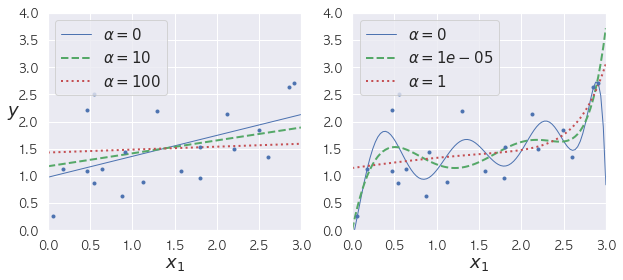

In [44]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

a는 람다값으로, 0일때는 penalty항이 삭제되어, 기존과 같이 높은 분산을 가지지만, 1에 가까워 질 수록 달라지는 것을 파악할 수 있습니다.

### 4.5.2 라쏘 회귀 (Lasso Regression)

**라쏘**(Lasso, Least Absolut Shrinkage and Selection Operator) 회귀는 또 다른 규제의 한 종류다. 라쏘의 규제항은 $\lambda \sum_{i=1}^{n}{\left| w_i \right|}$ 이며, 비용함수는 다음과 같다.

$$
J(w) = \text{MSE}(w) + \lambda \sum_{i=1}^{n}{\left| w_i \right|}
$$

라쏘 회귀의 중요한 특징은 상대적으로 덜 중요한 특성의 **가중치를 0**으로 만들어 버린다. 따라서, 라쏘 회귀는 모델에 필요한 특성을 선택하여 **희소 모델**(sparse model)을 만든다.

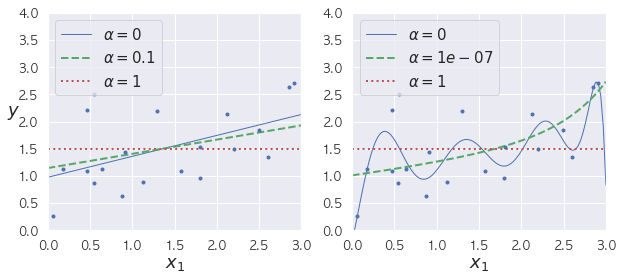

In [52]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

In [57]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
lasso_reg.predict([[1.5]])

array([1.53788174])

In [59]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.13498188])

#### Lasso vs Ridge

In [54]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# 편향은 무시
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

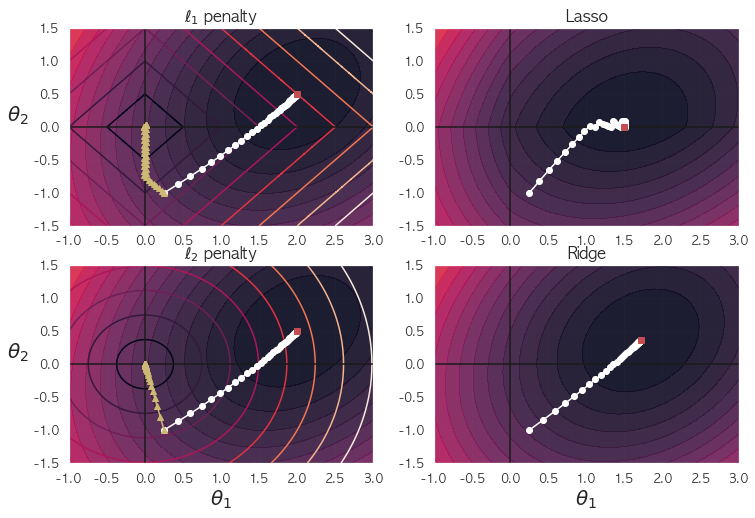

In [55]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0, labelpad=15)
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

![](./images/bais.png)
위의 그림과 같이 Penalty항이 변경되므로, Weights값의 변화량이 달라진다. 
람다값이 0일 경우 Penalty항은 존재하지 않게되며, 기존 회귀분석과 동일해진다.

### 4.5.3 엘라스틱넷 (Elastic Net)

**엘라스틱 넷**(Elastic Net)은 릿지(Ridge) 회귀와 라쏘(Lasso) 회귀를 절충한 모델이다. 

$$
J(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{w_i}^2 + \left( 1 - \alpha \right) \sum_{i=1}^{n}{\left| w_i \right|}, \quad \alpha = \frac{\lambda_2}{\lambda_2 + \lambda_1}
$$

- $\lambda_2$ : $L_2$, 즉 릿지 회귀의 하이퍼파라미터
- $\lambda_1$ : $L_1$, 즉 라쏘 회귀의 하이퍼파라미터

#### 어떠한 규제를 사용해야 할까?

- 규제(regularization)가 있는 모델이 대부분의 경우에 좋으므로 규제가 없는 모델을 사용하기 보다는 규제가 있는 모델을 사용하는 것이 좋다.
- 대부분의 경우에는 $L_2$ 규제 즉, 릿지가 좋지만 모델에 사용되는 특성이 적을것이라고 예상되는 경우에는 라쏘나, 엘라스틱넷을 사용하는 것이 좋다.
    - 그 이유는, 라쏘나 엘라스틱넷은 불필요한 특성을 0으로 만들어 주기 때문이다.
- 특성 수가 Train set 보다 많거나 몇개의 특성이 강한 상관성을 보인다면 엘라스틱넷을 사용하는 것이 좋다.

In [60]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

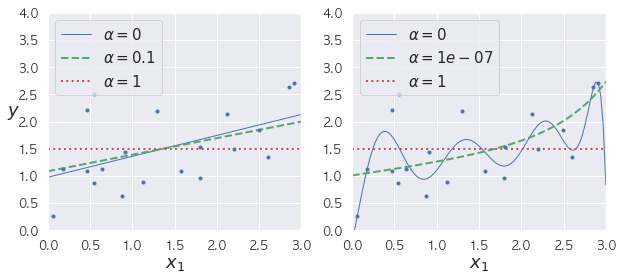

In [61]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

## 4.6 로지스틱 회귀 (Logistic Regression)

로지스틱 회귀는 이진 분류 알고리즘 중 하나인 모델이다. 로지스틱회귀분석은 회귀(Regression)이 아닌 분류(Classification)모델로 대표적이다. 회귀분석과 비슷하지만 odd와 sigmoid함수를 이용하여 구현할 수 있다.

### 4.6.1 확률 추정

로지스틱 회귀는 선형 회귀(linear regression)과 같이 입력 특성(feature)의 가중치 합을 계산한 뒤 로지스틱 함수(sigmoid)를 적용해 출력값을 계산한다. 

로지스틱은 y값을 A일 확률이라 하고, 0~1사이의 값으로 정규화 하여야한다.
$$
\hat{p} = h_{w}(\mathbf{x}) = \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x} \right)
$$

위의 식에서 $\sigma(\cdot)$이 바로 로지스틱(또는 로짓) 함수이며 0과 1사이의 값을 출력하는 **시그모이드 함수**(sigmoid function)이다.

$$
\sigma(x) = \frac{1}{1 + \text{exp}(-x)}
$$

로지스틱 회귀는 선형 회귀(linear regression)과 같이 입력 특성(feature)의 가중치 합을 계산한 뒤 로지스틱 함수(sigmoid)를 적용해 출력값을 계산한다. 

로지스틱은 y값을 A일 확률이라 하고, 0~1사이의 값으로 정규화 하여야한다.
기존 y를 정규화하기 위하여는 Odds를 통하여 가능하며, 이는 P일 확률 나누기 P가 아닐 확률과 같다.
$$
\text{odds} = \frac{p}{1 - \text{p}}
$$
odds는 0에서 무한대의 값을 가진다. 이에 대하여, 자연로그를 씌워주면 다음과 같다.
$$
\ln\text{odds} = \ln\frac{p}{1 - \text{p}} = \text{wx} * \text{b}
$$
이는 - 무한대에서 무한대의 값을 가진다. 이에 대해 양변에 자연함수를 추가하면, 
$$
\mathbf{e}^{\ln\text{odds}} = \mathbf{e}^{\ln\frac{p}{1 - \text{p}}} =\mathbf{e}^{ \text{wx} * \text{b}}
$$
$$
\frac{p}{1 - \text{p}} =\mathbf{e}^{ \text{wx} * \text{b}}
$$
로 자연함수의 지수형태가 된다. 이를 우리가 목적으로 하는 p에 대하여 정리하면
$$
\text{p} =\frac{\mathbf{e}^{ \text{wx} * \text{b}}}{1 + \mathbf{e}^{ \text{wx} * \text{b}}}
$$


위의 식이 바로 로지스틱(또는 로짓) 함수이며 0과 1사이의 값을 출력하는 **시그모이드 함수**(sigmoid function)이다.





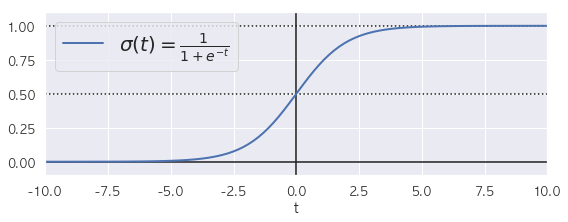

In [63]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

로지스틱 회귀의 모델은 아래와 같이 할 수 있다. 하지만, 상황에 따라 임계값(threshold)를 조절해줄 수 있다.

$$
\hat{y} = \begin{cases} 0 \quad \hat{p} < 0.5 \\ 1 \quad \hat{p} \ge 0.5 \end{cases}
$$

### 4.6.2 훈련과 비용 함수

Logistic Regression의 학습 데이터 하나에 대한 비용 함수는 다음과 같다.

$$
c(\mathbf{W}) = \begin{cases} -\log{\left( \hat{p} \right)} \quad \text{if, }y=1 \\ -\log{\left(1-\hat{p}\right)} \quad \text{if, }y = 0 \end{cases}
$$

전체 Train Set에 대한 비용 함수는 모든 데이터에 대한 비용의 평균이며, 이것을 **로그 손실**(log loss)라고 한다. 

$$
J(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}
$$

![](./images/4-12.jpg)
이는 앞서 보았던 MSE처럼 Convex하며, 모두 양수값을 지나간다.

로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.
![](./images/4-13.jpg)

위의 그림과 같은 방식으로 우리는 Cross Entropy를 미분하여, Weight를 업데이트 할수 있다.

### 4.6.4 소프트맥스 회귀 (Softmax Regression)

로지스틱 회귀 모델은 여러개의 이진 분류기를 만들지 않고, 다중 클래스(multinomial class) 분류에 적용할 수 있다. 이것을 **소프트맥스 회귀**(Softmax Regression) 또는 **다항 로지스틱 회귀**(Multinomial Logistic Regression)이라고 한다.

소프트맥스 회귀의 개념은 데이터 $x$에 대해 소프트맥스 회귀 모델이 각 클래스 $k$에 대한 점수(score) $S_k \left( x \right)$를 계산하고, 그 점수값에 **소프트맥스 함수**(softmax function)를 적용하여 각 클래스의 확률을 예측하는 모델이다. 

$$
S_k \left( \mathbf{x} \right) = \left( \mathbf{W}_{k} \right)^{T} \cdot \mathbf{x}
$$

- $\mathbf{W}_{k}$ : 각 클래스별 가중치 파라미터 벡터

위의 식을 이용해 소프트 맥스 함수를 적용한 식은 다음과 같다.

$$
\hat{p}_k = \sigma \left( s(\mathbf{x}) \right)_k = \frac{ \text{exp} \left( S_k(\mathbf{x}) \right)}{\sum_{j=1}^{K}{\text{exp} \left( S_j (\mathbf{x}) \right)}}
$$

- $K$ : 클래스의 수
- $s(\mathbf{x})$ : 데이터 샘플 $\mathbf{x}$에 대한 각 클래스의 점수를 담고 있는 벡터
- $\sigma \left( S(\mathbf{x}) \right)_k$ : 샘플 $\mathbf{x}$에 대한 클래스 $k$에 속할 추정 확률 벡터

소프트맥스의 장점은 각 클래스에 속할 확률의 총합이 1로 정규화되어, 각 클래스의 확률을 파악할 수 있다.

또한 소프트맥스과정에서 각 클래스에 속할 확률의 차이가 더욱 커지며, 이는 비용함수에서 맞았을 때의 차이를 작게하고
틀렸을 때의 차이를 작게하여, 학습의 정확도를 개선할 수 있다.

위의 식에서 추정된 확률 벡터 중 확률이 가장 높은 클래스로 분류가 된다. 이를 식으로 나타내면 다음과 같다.

$$
\hat{y} = \underset{k}{\text{arg}} \max{\sigma \left( S(\mathbf{x}) \right)_k} = \underset{k}{\text{arg}} \max{S_k(\mathbf{x})} = \underset{k}{\text{arg}} \max{\left( \mathbf{W_k}^{T} \cdot \mathbf{x}\right) } 
$$

소프트맥스 회귀의 학습을 위한 손실함수(loss function)은 **크로스 엔트로피**(cross entropy)이며 다음과 같다.

$$
J(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\sum_{k=1}^{K}{y_k^{(i)} \log{\left( \hat{p}_k^{(i)} \right)}}}
$$

- $i$번째 샘플에 대한 타겟 클래스가 $k$일 때, $y_k^{(i)}$가 1이고, 나머지는 0이 된다.

위의 손실함수에 대한 그래디언트 벡터는 다음과 같다.

$$
\nabla_{w^{(k)}} J(\mathbf{W}) = \frac{1}{m} \sum_{i=1}^{m}{\left( \hat{p}_k^{(i)} - y_k^{(i)} \right)\mathbf{x}^{(i)}}
$$

#### Scikit-Learn `LogisticRegression`을 이용해 Softmax Regression 사용하기

Scikit-Learn에서 [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)은 셋 이상의 다중 클래스 분류에서는 기본적으로 일대다(OvA)를 디폴트 값으로 사용하지만, `multi_class`인자를 `multinomial`로 설정하면 Softmax Regression을 사용할 수 있다. 또한 `solver` 인자에 `lbfgs`로 지정해야한다.

In [24]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

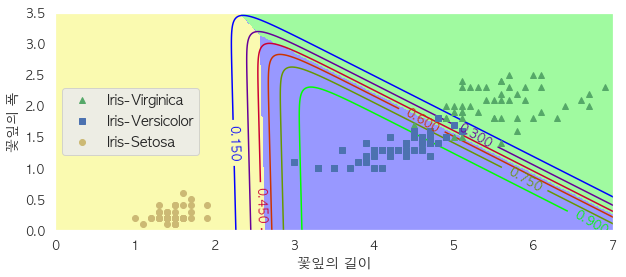

In [25]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [26]:
softmax_reg.predict([[5, 2]])

array([2])

In [27]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])